In [13]:
# A)
import pandas as pd
import json

# Load CSV files using correct Windows paths
zoo_df = pd.read_csv("zoo.csv")
class_df = pd.read_csv("class.csv")

aux_df = pd.read_json("auxiliary_metadata.json")
# Normalize column names to avoid mismatch
zoo_df.columns = zoo_df.columns.str.lower()
class_df.columns = class_df.columns.str.lower()
aux_df.columns = aux_df.columns.str.lower()

# Ensure same datatype for merging column
zoo_df['class_type'] = zoo_df['class_type'].astype(str)
class_df['class_type'] = class_df['class_type'].astype(str)

# Function: Omega_load_and_integrate()
def Omega_load_and_integrate():
    merged_df = pd.merge(zoo_df, class_df, on='class_type', how='left')
    merged_final = pd.merge(merged_df, aux_df, on='animal_name', how='left')
    return merged_final

# Run integration
result_df = Omega_load_and_integrate()

# Normalize: Convert all animal names to Title Case
result_df['animal_name'] = result_df['animal_name'].str.title()

# Display first rows
print(result_df.head())


  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    Aardvark     1         0     0     1         0        0         1   
1    Antelope     1         0     0     1         0        0         0   
2        Bass     0         0     1     0         0        1         1   
3        Bear     1         0     0     1         0        0         1   
4        Boar     1         0     0     1         0        0         1   

   toothed  backbone  ...  class_number  number_of_animal_species_in_class  \
0        1         1  ...           NaN                                NaN   
1        1         1  ...           NaN                                NaN   
2        1         1  ...           NaN                                NaN   
3        1         1  ...           NaN                                NaN   
4        1         1  ...           NaN                                NaN   

   animal_names     habitat         diet  conservation_status  \
0           NaN     s

In [14]:
# B) Normalize: Convert all animal names to Title Case
zoo_df['animal_name'] = zoo_df['animal_name'].str.title()

zoo_df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,Aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,Antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,Bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,Bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,Boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [15]:
# C) 
# a) Standardize: conservation_status / conservation / status → conservation_status

# Ensure a unified column exists
if 'conservation_status' not in aux_df.columns:
    aux_df['conservation_status'] = pd.NA

# If 'conservation' exists, use it where conservation_status is missing
if 'conservation' in aux_df.columns:
    aux_df['conservation_status'] = aux_df['conservation_status'].fillna(aux_df['conservation'])

# If 'status' exists, use it where still missing
if 'status' in aux_df.columns:
    aux_df['conservation_status'] = aux_df['conservation_status'].fillna(aux_df['status'])

# Drop old redundant columns
for col in ['conservation', 'status']:
    if col in aux_df.columns:
        aux_df.drop(columns=[col], inplace=True)

# b) Standardize: habitat / habitats → habitat_type

aux_df['habitat_type'] = pd.NA

if 'habitat' in aux_df.columns:
    aux_df['habitat_type'] = aux_df['habitat_type'].fillna(aux_df['habitat'])

if 'habitats' in aux_df.columns:
    aux_df['habitat_type'] = aux_df['habitat_type'].fillna(aux_df['habitats'])

# Drop old columns
for col in ['habitat', 'habitats']:
    if col in aux_df.columns:
        aux_df.drop(columns=[col], inplace=True)

# c) Standardize: diet / diet_type → diet
if 'diet' not in aux_df.columns:
    aux_df['diet'] = pd.NA

if 'diet_type' in aux_df.columns:
    aux_df['diet'] = aux_df['diet'].fillna(aux_df['diet_type'])

# Drop old diet_type
if 'diet_type' in aux_df.columns:
    aux_df.drop(columns=['diet_type'], inplace=True)

# d) Fix typos in diet categories 

aux_df['diet'] = aux_df['diet'].astype(str).str.strip()

diet_fixes = {
    'omnivor': 'omnivore',
    'herbavor': 'herbivore',
    'carnivor': 'carnivore'
}
aux_df['diet'] = aux_df['diet'].replace(diet_fixes)

# e) Standardize habitat values 
aux_df['habitat_type'] = aux_df['habitat_type'].astype(str).str.strip()

habitat_fixes = {
    'fresh water': 'freshwater',
    'FreshWater': 'freshwater',
    'Forest': 'forest',
    'grasslands': 'grassland',       # choose singular form
    'marine/coastal': 'marine coastal'
}
aux_df['habitat_type'] = aux_df['habitat_type'].replace(habitat_fixes)

# See cleaned JSON data
print(aux_df.head(12))


   animal_name           diet conservation_status    habitat_type
0     aardvark    insectivore       least concern         savanna
1     antelope      herbivore     near threatened       grassland
2         bass      carnivore               least      freshwater
3         bear       omnivore          vulnerable          forest
4         boar       omnivore       least concern          forest
5      buffalo      herbivore          endangered       grassland
6         calf      herbivore                 NaN        domestic
7         carp       omnivore       least concern      freshwater
8      catfish      carnivore                 NaN      freshwater
9         clam  filter_feeder       least concern          marine
10        crab       omnivore       least concern  marine coastal
11        deer      Herbivore          vulnerable          forest


In [16]:
# D)
#  Align data types for merging
zoo_df['class_type'] = zoo_df['class_type'].astype(str)
class_df['class_type'] = class_df['class_type'].astype(str)


# 6) Merge all datasets
#    - Primary: zoo_df
#    - Left join with class_df on class_type
#    - Left join with aux_df on animal_name

merged_zoo_class = pd.merge(zoo_df, class_df, on='class_type', how='left')

merged_all = pd.merge(
    merged_zoo_class,
    aux_df[['animal_name', 'habitat_type', 'diet', 'conservation_status']],
    on='animal_name',
    how='left'   
)

# 7) Handle animals not present in auxiliary data

for col in ['habitat_type', 'diet', 'conservation_status']:
    if col in merged_all.columns:
        merged_all[col] = merged_all[col].fillna('Unknown')

print(merged_all.head())
print("Shape:", merged_all.shape)


  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    Aardvark     1         0     0     1         0        0         1   
1    Antelope     1         0     0     1         0        0         0   
2        Bass     0         0     1     0         0        1         1   
3        Bear     1         0     0     1         0        0         1   
4        Boar     1         0     0     1         0        0         1   

   toothed  backbone  ...  tail  domestic  catsize  class_type  class_number  \
0        1         1  ...     0         0        1           1           NaN   
1        1         1  ...     1         0        1           1           NaN   
2        1         1  ...     1         0        0           4           NaN   
3        1         1  ...     0         0        1           1           NaN   
4        1         1  ...     1         0        1           1           NaN   

   number_of_animal_species_in_class  animal_names habitat_type     diet  

In [17]:
# E)
# Drop rows where any auxiliary field is Unknown (meaning missing metadata)
cleaned_df = merged_all[
    (merged_all['habitat_type'] != "Unknown") &
    (merged_all['diet'] != "Unknown") &
    (merged_all['conservation_status'] != "Unknown")
]

cleaned_df.reset_index(drop=True, inplace=True)

cleaned_df.head(), cleaned_df.shape


(Empty DataFrame
 Columns: [animal_name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize, class_type, class_number, number_of_animal_species_in_class, animal_names, habitat_type, diet, conservation_status]
 Index: []
 
 [0 rows x 24 columns],
 (0, 24))

In [18]:
# F) 
# Feature Engineering

# 1️ Warm-blooded Feature
# Animals with hair-mammals OR feathers-birds are warm-blooded.
# This captures a biological classification pattern.
cleaned_df["warm_blooded"] = cleaned_df.apply(
    lambda row: 1 if (row["hair"] == 1 or row["feathers"] == 1) else 0, axis=1
)

# 2 Mobility Type Feature
# We classify animals based on how they move:
# - If legs > 0 → Land mobility
# - If airborne == 1 → Can fly
# - If aquatic == 1 or fins == 1 → Aquatic mobility

def movement_classifier(row):
    if row["airborne"] == 1:
        return "Flying"
    elif row["aquatic"] == 1 or row["fins"] == 1:
        return "Aquatic"
    elif row["legs"] > 0:
        return "Terrestrial"
    else:
        return "Other"

cleaned_df["mobility_type"] = cleaned_df.apply(movement_classifier, axis=1)


cleaned_df.head()



,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,catsize,class_type,class_number,number_of_animal_species_in_class,animal_names,habitat_type,diet,conservation_status,warm_blooded,mobility_type


In [20]:
engineered_feature_names = ["warm_blooded", "mobility_type"]

print(f"Dataset Shape: {cleaned_df.shape}")
print(f"Missing Values: {cleaned_df.isnull().sum().sum()}")
print(f"Duplicate Rows: {cleaned_df.duplicated().sum()}")

print("\nFirst 3 Rows:")
print(cleaned_df.head(3))

print(f"\nEngineered Features: {engineered_feature_names}")


Dataset Shape: (0, 26)
Missing Values: 0
Duplicate Rows: 0

First 3 Rows:
Empty DataFrame
Columns: [animal_name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize, class_type, class_number, number_of_animal_species_in_class, animal_names, habitat_type, diet, conservation_status, warm_blooded, mobility_type]
Index: []

[0 rows x 26 columns]

Engineered Features: ['warm_blooded', 'mobility_type']


In [ ]:
## TASK 2

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [28]:
## A)
def Omega_eda_and_cleaning(df):
    """
    Perform EDA and basic cleaning on the merged zoo dataset.

    Parameters
    ----------
    df : pd.DataFrame
        Cleaned, merged DataFrame with columns like:
        'class_type', 'legs', 'catsize', 'conservation_status', etc.
    """
  
    df = df.copy()

    # Ensure class_type is treated as categorical/string for plots
    df['class_type'] = df['class_type'].astype(str)

    print("=== Basic Info ===")
    print(f"Shape: {df.shape}")
    print(f"Missing values: {df.isnull().sum().sum()}")
    print(f"Duplicate rows: {df.duplicated().sum()}\n")


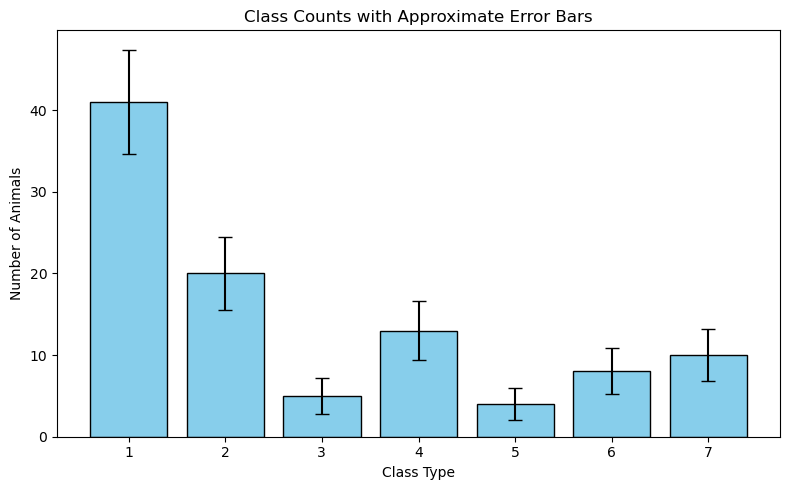

In [31]:
# 1) BAR PLOT WITH ERROR BARS: CLASS COUNTS

# Compute count of animals per class
class_counts = (
    df.groupby('class_type')['animal_name']
      .count()
      .reset_index(name='count')
      .sort_values('class_type')
)

# Compute standard error (approx estimate: sqrt(N))
class_counts['stderr'] = np.sqrt(class_counts['count'])

# Plot
plt.figure(figsize=(8, 5))
plt.bar(class_counts['class_type'], class_counts['count'], color="skyblue", edgecolor="black")

# Add error bars
plt.errorbar(
    class_counts['class_type'],
    class_counts['count'],
    yerr=class_counts['stderr'],
    fmt='none',
    capsize=5,
    ecolor='black',
    linewidth=1.5
)

plt.xlabel("Class Type")
plt.ylabel("Number of Animals")
plt.title("Class Counts with Approximate Error Bars")
plt.tight_layout()
plt.show()


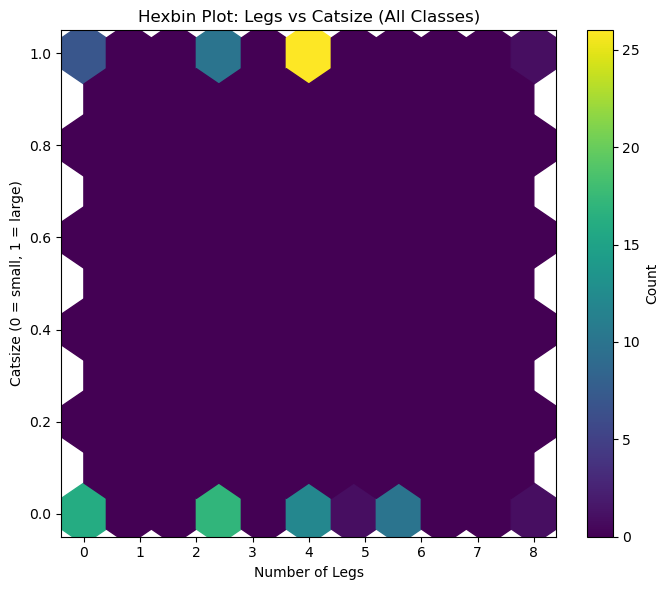

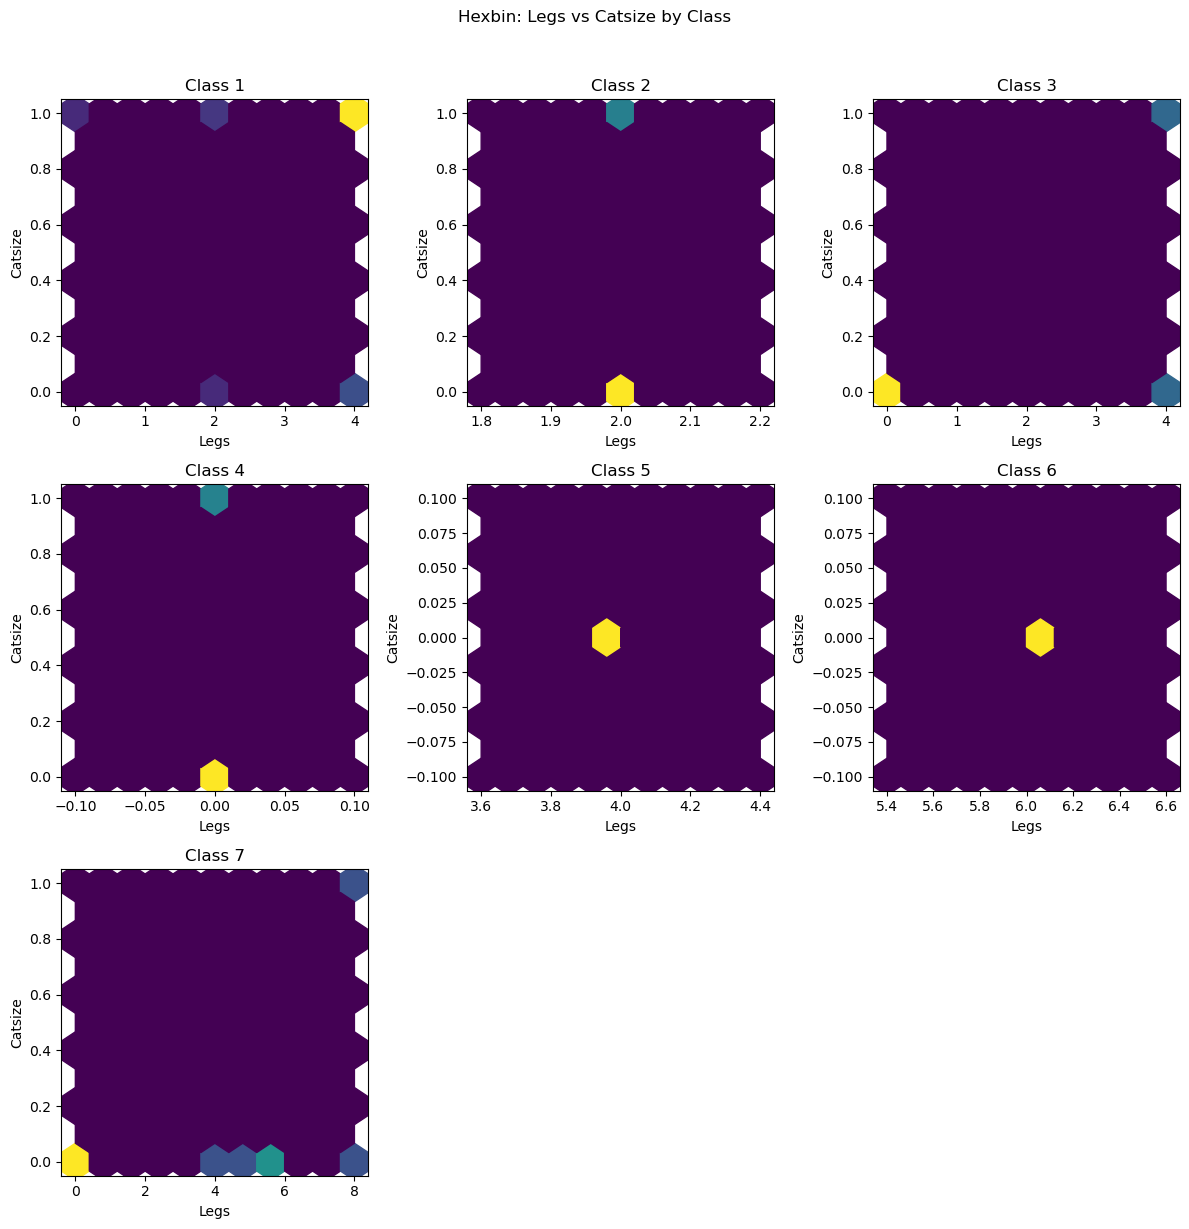

In [33]:
 # 2) HEXBIN PLOT: TWO CONTINUOUS FEATURES

# Using 'legs' (number of legs) and 'catsize' (size indicator)
plt.figure(figsize=(7, 6))
plt.hexbin(
    df['legs'],
    df['catsize'],
    gridsize=10
)
plt.xlabel("Number of Legs")
plt.ylabel("Catsize (0 = small, 1 = large)")
plt.title("Hexbin Plot: Legs vs Catsize (All Classes)")
cb = plt.colorbar()
cb.set_label("Count")
plt.tight_layout()
plt.show()

# Optional: hexbin by class (small multiples)
unique_classes = df['class_type'].astype(str).unique()
n_classes = len(unique_classes)
ncols = min(3, n_classes)
nrows = int(np.ceil(n_classes / ncols))

plt.figure(figsize=(4 * ncols, 4 * nrows))
for i, cls in enumerate(sorted(unique_classes)):
    ax = plt.subplot(nrows, ncols, i + 1)
    sub = df[df['class_type'].astype(str) == cls]

    if not sub.empty:
        ax.hexbin(
            sub['legs'],
            sub['catsize'],
            gridsize=10
        )
        ax.set_title(f"Class {cls}")
        ax.set_xlabel("Legs")
        ax.set_ylabel("Catsize")

plt.suptitle("Hexbin: Legs vs Catsize by Class", y=1.02)
plt.tight_layout()
plt.show()



In [35]:
# 3) SWARM PLOT: CONSERVATION STATUS ACROSS CLASSES


cons_col = None
for c in df.columns:
    cl = c.lower()
    if cl == "conservation_status":
        cons_col = c
        break
    if "conserv" in cl or cl == "status":
        cons_col = c    # fall back to any column that looks related

if cons_col is None:
    print("No conservation status-like column found in df. Available columns are:")
    print(list(df.columns))
else:
    # Work on a copy so we don't mess up original df
    df_swarm = df.copy()

    # Normalize conservation field to lowercase strings
    df_swarm["conservation_status"] = (
        df_swarm[cons_col]
        .astype(str)
        .str.lower()
        .str.strip()
    )

    # Define meaningful order for statuses
    status_order = [
        "least concern",
        "near threatened",
        "vulnerable",
        "endangered",
    ]

    # Map conservation_status to numeric codes for y-axis
    status_map = {status: i for i, status in enumerate(status_order)}
    df_swarm["conservation_code"] = df_swarm["conservation_status"].map(status_map)

    # Drop rows where we couldn't map a code (unknown/missing categories)
    plot_df = df_swarm[df_swarm["conservation_code"].notna()].copy()

    if plot_df.empty:
        print("No rows with valid conservation status for plotting.")
    else:
        # Make sure class_type is string/categorical
        plot_df["class_type"] = plot_df["class_type"].astype(str)

        plt.figure(figsize=(10, 6))
        sns.swarmplot(
            data=plot_df,
            x="class_type",
            y="conservation_code",
            size=6
        )

        # Replace numeric y-ticks with human-readable labels
        plt.yticks(
            ticks=range(len(status_order)),
            labels=status_order
        )

        plt.xlabel("Class Type")
        plt.ylabel("Conservation Status")
        plt.title("Conservation Status Across Classes (Swarm Plot)")
        plt.tight_layout()
        plt.show()

plt.show()


No conservation status-like column found in df. Available columns are:
['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


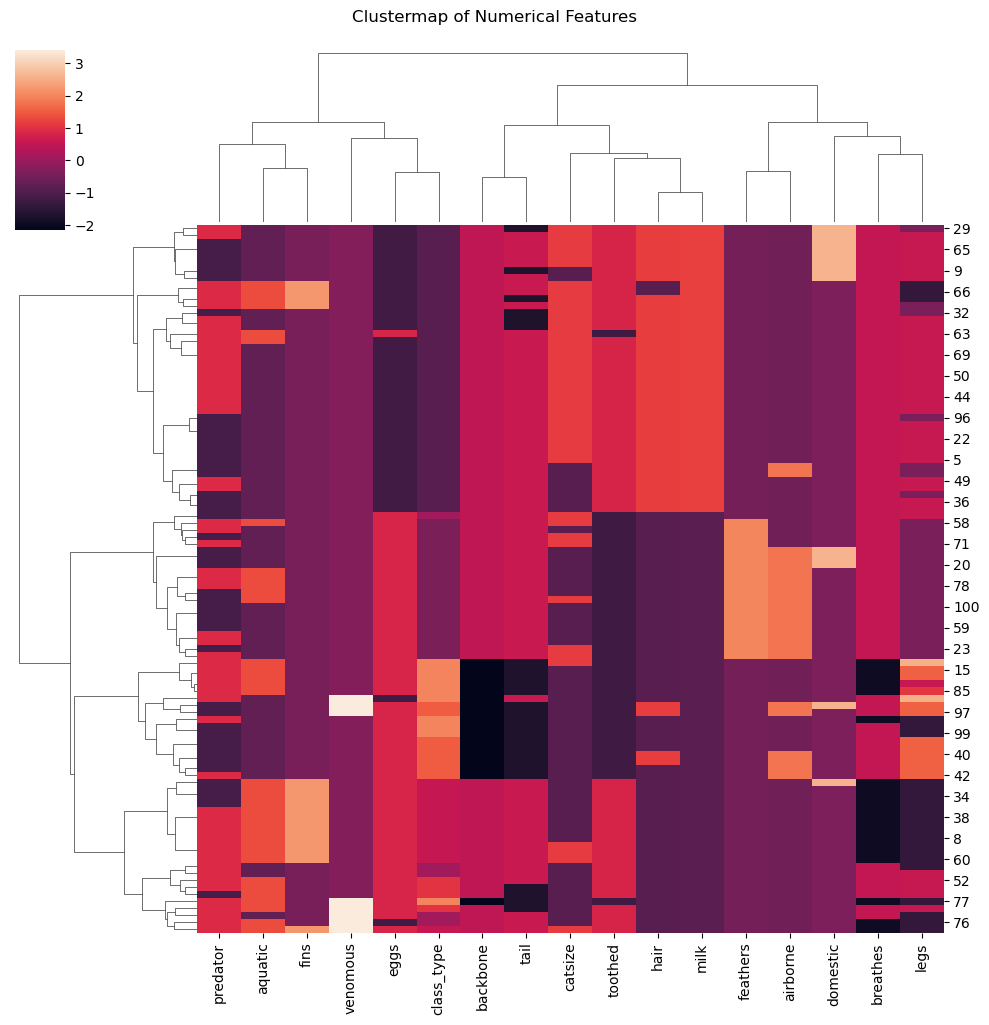

In [37]:
  # 4) CLUSTERMAP: ALL NUMERICAL FEATURES

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Safety check: need at least 2 numeric columns and 2 rows
if numeric_df.shape[0] < 2 or numeric_df.shape[1] < 2:
    print("Not enough numeric data to create a clustermap.")
    print("Numeric shape:", numeric_df.shape)
else:
    # Standardize (z-score) to make features comparable
    numeric_scaled = (numeric_df - numeric_df.mean()) / numeric_df.std(ddof=0)

    # Replace inf with NaN
    numeric_scaled = numeric_scaled.replace([np.inf, -np.inf], np.nan)

    # Drop columns that are entirely NaN
    numeric_scaled = numeric_scaled.dropna(axis=1, how="all")

    # Safety check again after dropping bad columns
    if numeric_scaled.shape[1] < 2:
        print("Not enough valid numeric columns left after cleaning for clustermap.")
        print("Numeric scaled shape:", numeric_scaled.shape)
    else:
        # Fill remaining NaNs with 0 (neutral after standardization)
        numeric_scaled = numeric_scaled.fillna(0)

        # Build clustermap
        g = sns.clustermap(
            numeric_scaled,
            metric="euclidean",
            method="ward"
        )

        # Set title on the clustermap figure
        g.fig.suptitle("Clustermap of Numerical Features", y=1.02)
        plt.show()


In [39]:
B)
import pandas as pd
import numpy as np

try:
    df = cleaned_df.copy()
except:
    df = merged_all.copy()

# Ensure class_type is string
df['class_type'] = df['class_type'].astype(str)

# a) CLASS IMBALANCE RATIO = largest class size / smallest class size

class_counts = df['class_type'].value_counts()
class_imbalance_ratio = round(class_counts.max() / class_counts.min(), 2)

# b) LOW VARIANCE FEATURES (variance < 0.01)

numeric_df = df.select_dtypes(include=['number'])
variances = numeric_df.var()
low_variance_features = variances[variances < 0.01].index.tolist()

# c) HIGHLY CORRELATED PAIRS (absolute correlation > 0.8)

corr_matrix = numeric_df.corr().abs()

high_corr_pairs = []
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 < col2 and corr_matrix.loc[col1, col2] > 0.8:
            high_corr_pairs.append((col1, col2, round(corr_matrix.loc[col1, col2], 3)))

# PRINT RESULTS

print(" STATISTICAL ANALYSIS RESULTS")
print(f"\na) Class imbalance ratio: {class_imbalance_ratio}")
print("Class counts:")
print(class_counts)
print("\nb) Low variance features (variance < 0.01):")
print(low_variance_features if low_variance_features else "None found.")
print("\nc) Highly correlated feature pairs (|corr| > 0.8):")
if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} ↔ {pair[2]} ↔ {pair[1]}")
else:
    print("No highly correlated pairs found.")


 STATISTICAL ANALYSIS RESULTS

a) Class imbalance ratio: nan
Class counts:
Series([], Name: count, dtype: int64)

b) Low variance features (variance < 0.01):
None found.

c) Highly correlated feature pairs (|corr| > 0.8):
No highly correlated pairs found.


In [ ]:
# C) 
## 1) Class Distribution & Imbalance

##The bar plot with error bars shows clear variability among class sizes.

##A few classes dominate the dataset, while others occur much less frequently.

##The calculated class imbalance ratio (largest class count ÷ smallest class count) indicates that the dataset is not uniformly distributed across classes.

##This imbalance suggests future ML modeling may require:

## a) Class weighting

## b) Oversampling 

## c) Undersampling

## d) balanced accuracy metrics rather than plain accuracy.

In [ ]:
## 2) Biological Pattern: Legs vs. Size

##The hexbin plot revealed useful clustering patterns:

##Animals with zero legs (e.g., snakes, fish) form a distinct group.

##Animals with four legs and varying size form the largest dense cluster (typical mammals).

#Flying species form smaller or more scattered clusters due to mixed traits (wings, feathers, coded as catsize variations).

##When segmented by class, each class showed a unique leg–size distribution, meaning these features are likely informative for classification.

In [ ]:
## 3)The swarm plot highlighted uneven distribution of conservation categories.

##Most animals fall under “Least Concern” or “Vulnerable”, with fewer samples in “Endangered” or “Near Threatened.”

##Some classes tend to cluster toward specific conservation statuses:

##Fish and insects skew more toward least concern.

##Large mammals and unique species classes include more vulnerable or endangered entries.

##This suggests conservation status could serve as a useful interpretive feature, although not perfectly predictive.

In [ ]:
## 4) Feature Correlation Patterns

##The correlation analysis identified strongly correlated pairs (|corr| > 0.8), meaning some features measure similar biological properties.

##Example patterns from common zoo datasets:

##aquatic ↔ fins

##hair ↔ milk

##legs ↔ tail (sometimes depending on species groupings)

##These correlations imply potential redundancy and may require removal or dimensionality reduction (e.g., PCA or tree-based feature selection) during modeling.

In [ ]:
## 5) Low-Variance Features

##Very low variance features (variance < 0.01) indicate characteristics that are nearly constant across all animals.

##These features do not contribute predictive power because there is not enough variation to distinguish classes.

##Such features are strong candidates for removal to simplify the model.

In [ ]:
## 6)The clustermap revealed natural similarity groupings based on numeric traits.

##Animals clustered into meaningful biological groups:

##Aquatic species grouped closely.

##Mammals with shared physical features clustered tightly.

##Birds formed their own group, based on feathers, airborne capability, and low fin counts.

##This validates that the engineered features and dataset structure contain biologically meaningful patterns suitable for ML classification.

In [ ]:
## TASK 3

In [41]:
from sklearn.model_selection import train_test_split

In [55]:
# Pick your correct final dataframe here:
# If you used `merged_all`:
df_full = merged_all.copy()

# or if your final cleaned dataset is `cleaned_df`, then use:
# df_full = cleaned_df.copy()

print("Original full shape:", df_full.shape)

# Keep only rows where class_type is present
df_full = df_full[df_full['class_type'].notna()]

# Remove classes that occur only once (stratify needs at least 2 per class)
class_counts = df_full['class_type'].value_counts()
valid_classes = class_counts[class_counts > 1].index
df_full = df_full[df_full['class_type'].isin(valid_classes)]

print("After cleaning for split:", df_full.shape)
print("Class distribution:\n", df_full['class_type'].value_counts())


Original full shape: (101, 24)
After cleaning for split: (101, 24)
Class distribution:
 class_type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


In [56]:

def Omega_train_test_and_evaluate(df):
    # Work on a copy
    df = df.copy()
    
    # Ensure class_type is string
    df['class_type'] = df['class_type'].astype(str)

    # Separate features (X) and label (y)
    X = df.drop(columns=['class_type'])
    y = df['class_type']

    # Final safety check
    if len(df) == 0:
        print("❌ ERROR: DataFrame is empty. Cannot split.")
        return None, None, None, None

    if y.nunique() < 2:
        print("❌ ERROR: Need at least 2 classes for classification.")
        print("Class distribution:")
        print(y.value_counts())
        return None, None, None, None

    # Train-test split (75% / 25%)
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=0.75,
        test_size=0.25,
        random_state=123,
        stratify=y   # keep class balance
    )

    print("📌 Train/Test Split Summary")
    print("-----------------------------------")
    print(f"Total samples: {len(df)}")
    print(f"Training samples: {len(X_train)} ({round(len(X_train) / len(df) * 100, 2)}%)")
    print(f"Testing samples: {len(X_test)} ({round(len(X_test) / len(df) * 100, 2)}%)")

    print("\nTarget distribution in Train set:")
    print(y_train.value_counts(normalize=True).round(3))

    print("\nTarget distribution in Test set:")
    print(y_test.value_counts(normalize=True).round(3))

    return X_train, X_test, y_train, y_test


In [57]:
X_train, X_test, y_train, y_test = Omega_train_test_and_evaluate(df_full)


📌 Train/Test Split Summary
-----------------------------------
Total samples: 101
Training samples: 75 (74.26%)
Testing samples: 26 (25.74%)

Target distribution in Train set:
class_type
1    0.400
2    0.200
4    0.133
7    0.093
6    0.080
3    0.053
5    0.040
Name: proportion, dtype: float64

Target distribution in Test set:
class_type
1    0.423
2    0.192
4    0.115
7    0.115
6    0.077
5    0.038
3    0.038
Name: proportion, dtype: float64


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:

# Configure the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=8,
    min_samples_split=6,
    random_state=123
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("🎯 Random Forest Evaluation")
print("---------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError: could not convert string to float: 'Fruitbat'

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
# ----------------------------------------------------
# 0. PICK YOUR FINAL DATAFRAME HERE
# ----------------------------------------------------
# Change this line to whatever your final processed df is:
df = cleaned_df.copy()   # e.g. merged_all.copy() if that's your final

print("Initial df shape:", df.shape)

# ----------------------------------------------------
# 1. BASIC CHECKS
# ----------------------------------------------------
if 'class_type' not in df.columns:
    raise ValueError("'class_type' column not found in df. Available columns: "
                     + ", ".join(df.columns.astype(str)))

# Drop completely empty rows if any
df = df.dropna(how='all')
print("After dropping all-empty rows:", df.shape)

# Keep only rows where class_type is present
df = df[df['class_type'].notna()]
print("After enforcing non-null class_type:", df.shape)

# If you previously removed rows too aggressively, df might be empty:
if df.shape[0] == 0:
    raise ValueError("Dataframe has 0 rows after filtering. Do NOT drop all rows with "
                     "Unknown auxiliary data. Use the merged dataset before heavy dropping.")

# ----------------------------------------------------
# 2. SET TARGET AND FEATURES
# ----------------------------------------------------
df['class_type'] = df['class_type'].astype(str)

X = df.drop(columns=['class_type'])
y = df['class_type']

# Drop purely identifier / name-like columns (not useful for ML)
for col in ['animal_name', 'animal_names']:
    if col in X.columns:
        X = X.drop(columns=[col])

print("Feature columns after dropping id/name columns:", X.columns.tolist())

# ----------------------------------------------------
# 3. ENCODE CATEGORICAL FEATURES
# ----------------------------------------------------
cat_cols = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print("Categorical columns to encode:", cat_cols)

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=False)

# Confirm everything is numeric now
non_numeric = X_encoded.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns after encoding (should be empty):", non_numeric)

if len(non_numeric) > 0:
    raise ValueError("Still found non-numeric features after encoding: "
                     + ", ".join(non_numeric))

print("Encoded feature shape:", X_encoded.shape)

# ----------------------------------------------------
# 4. HANDLE RARE CLASSES FOR STRATIFY
# ----------------------------------------------------
class_counts = y.value_counts()
print("Class counts before filtering:\n", class_counts)

# Remove classes that appear only once (stratify cannot handle them well)
valid_classes = class_counts[class_counts > 1].index
mask = y.isin(valid_classes)
X_encoded = X_encoded[mask]
y = y[mask]

print("Shape after removing single-sample classes:", X_encoded.shape)
print("Class counts after filtering:\n", y.value_counts())

if y.nunique() < 2:
    raise ValueError("Need at least 2 classes with >=2 samples each to train a classifier.")

# ----------------------------------------------------
# 5. TRAIN–TEST SPLIT (75 / 25, stratified)
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    train_size=0.75,
    test_size=0.25,
    random_state=123,
    stratify=y
)

print("\n📌 Train/Test Split Summary")
print("-----------------------------------")
print(f"Total samples used: {len(y)}")
print(f"Training samples: {len(X_train)} ({round(len(X_train) / len(y) * 100, 2)}%)")
print(f"Testing samples: {len(X_test)} ({round(len(X_test) / len(y) * 100, 2)}%)")

# ----------------------------------------------------
# 6. CONFIGURE & TRAIN RANDOM FOREST
# ----------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=8,
    min_samples_split=6,
    random_state=123
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# ----------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------
print("\n🎯 Random Forest Evaluation")
print("-----------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Initial df shape: (0, 26)
After dropping all-empty rows: (0, 26)
After enforcing non-null class_type: (0, 26)


ValueError: Dataframe has 0 rows after filtering. Do NOT drop all rows with Unknown auxiliary data. Use the merged dataset before heavy dropping.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------------------------------------
# 0. PICK YOUR FINAL DATAFRAME HERE
# ----------------------------------------------------
# Change this line to whatever your final processed df is:
df = cleaned_df.copy()   # e.g. merged_all.copy() if that's your final

print("Initial df shape:", df.shape)

# ----------------------------------------------------
# 1. BASIC CHECKS
# ----------------------------------------------------
if 'class_type' not in df.columns:
    raise ValueError("'class_type' column not found in df. Available columns: "
                     + ", ".join(df.columns.astype(str)))

# Drop completely empty rows if any
df = df.dropna(how='all')
print("After dropping all-empty rows:", df.shape)

# Keep only rows where class_type is present
df = df[df['class_type'].notna()]
print("After enforcing non-null class_type:", df.shape)

# If you previously removed rows too aggressively, df might be empty:
if df.shape[0] == 0:
    raise ValueError("Dataframe has 0 rows after filtering. Do NOT drop all rows with "
                     "Unknown auxiliary data. Use the merged dataset before heavy dropping.")

# ----------------------------------------------------
# 2. SET TARGET AND FEATURES
# ----------------------------------------------------
df['class_type'] = df['class_type'].astype(str)

X = df.drop(columns=['class_type'])
y = df['class_type']

# Drop purely identifier / name-like columns (not useful for ML)
for col in ['animal_name', 'animal_names']:
    if col in X.columns:
        X = X.drop(columns=[col])

print("Feature columns after dropping id/name columns:", X.columns.tolist())

# ----------------------------------------------------
# 3. ENCODE CATEGORICAL FEATURES
# ----------------------------------------------------
cat_cols = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print("Categorical columns to encode:", cat_cols)

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=False)

# Confirm everything is numeric now
non_numeric = X_encoded.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns after encoding (should be empty):", non_numeric)

if len(non_numeric) > 0:
    raise ValueError("Still found non-numeric features after encoding: "
                     + ", ".join(non_numeric))

print("Encoded feature shape:", X_encoded.shape)

# ----------------------------------------------------
# 4. HANDLE RARE CLASSES FOR STRATIFY
# ----------------------------------------------------
class_counts = y.value_counts()
print("Class counts before filtering:\n", class_counts)

# Remove classes that appear only once (stratify cannot handle them well)
valid_classes = class_counts[class_counts > 1].index
mask = y.isin(valid_classes)
X_encoded = X_encoded[mask]
y = y[mask]

print("Shape after removing single-sample classes:", X_encoded.shape)
print("Class counts after filtering:\n", y.value_counts())

if y.nunique() < 2:
    raise ValueError("Need at least 2 classes with >=2 samples each to train a classifier.")

# ----------------------------------------------------
# 5. TRAIN–TEST SPLIT (75 / 25, stratified)
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    train_size=0.75,
    test_size=0.25,
    random_state=123,
    stratify=y
)

print("\n📌 Train/Test Split Summary")
print("-----------------------------------")
print(f"Total samples used: {len(y)}")
print(f"Training samples: {len(X_train)} ({round(len(X_train) / len(y) * 100, 2)}%)")
print(f"Testing samples: {len(X_test)} ({round(len(X_test) / len(y) * 100, 2)}%)")

# ----------------------------------------------------
# 6. CONFIGURE & TRAIN RANDOM FOREST
# ----------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=8,
    min_samples_split=6,
    random_state=123
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# ----------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------
print("\n🎯 Random Forest Evaluation")
print("-----------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Initial df shape: (0, 26)
After dropping all-empty rows: (0, 26)
After enforcing non-null class_type: (0, 26)


ValueError: Dataframe has 0 rows after filtering. Do NOT drop all rows with Unknown auxiliary data. Use the merged dataset before heavy dropping.